# Домашняя работа №5.

* Написать модель (с помощью выдвижения гипотез или применяя модель Random Forest) (можно почистить от выбросов) на датасет больных сердечными болезнями.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
%matplotlib inline

In [2]:
url="http://yustiks.ru/dataset/cardio_train.csv"
data=pd.read_csv(url,sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

In [ ]:
Данный датасет разобран в начале лекции 5. Основная задача: определить, что влияет на сердечную болезнь больше всего. Например,
    выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравнваем курящих пациентов с некурящими, и определяя насколько
    статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима) 
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature importance(Random Forest).
    Оцениваем гипотезу. Делаем вывод.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B7740C8>,
      dtype=object)

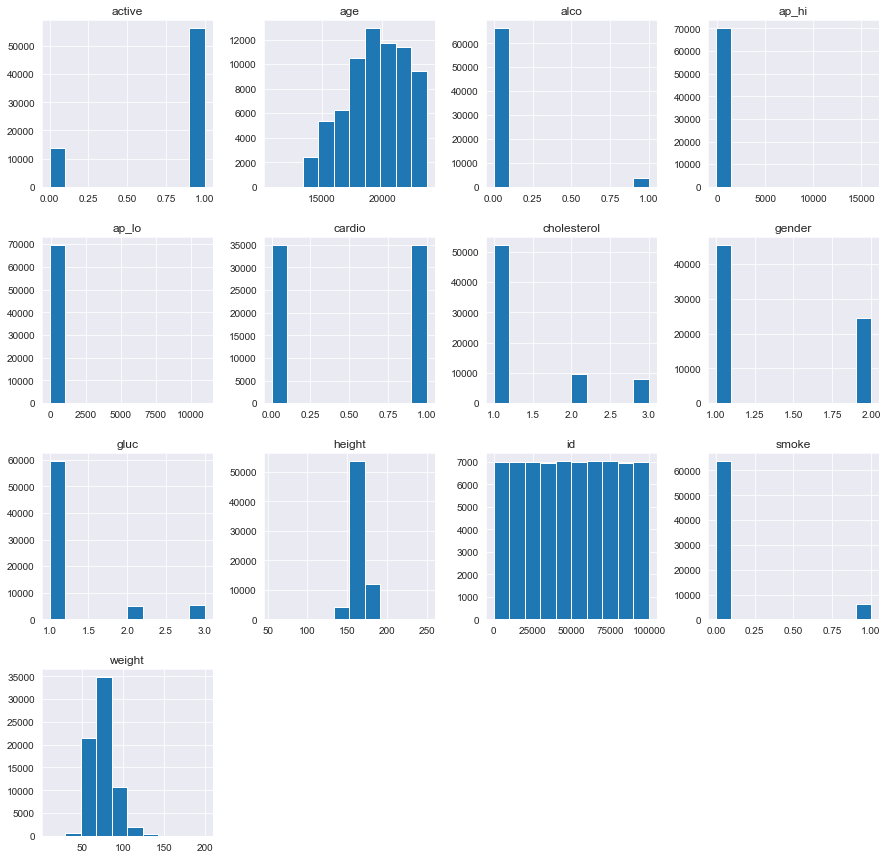

In [3]:
#проверяю распредения атрибутов
data.hist(figsize=(15,15))

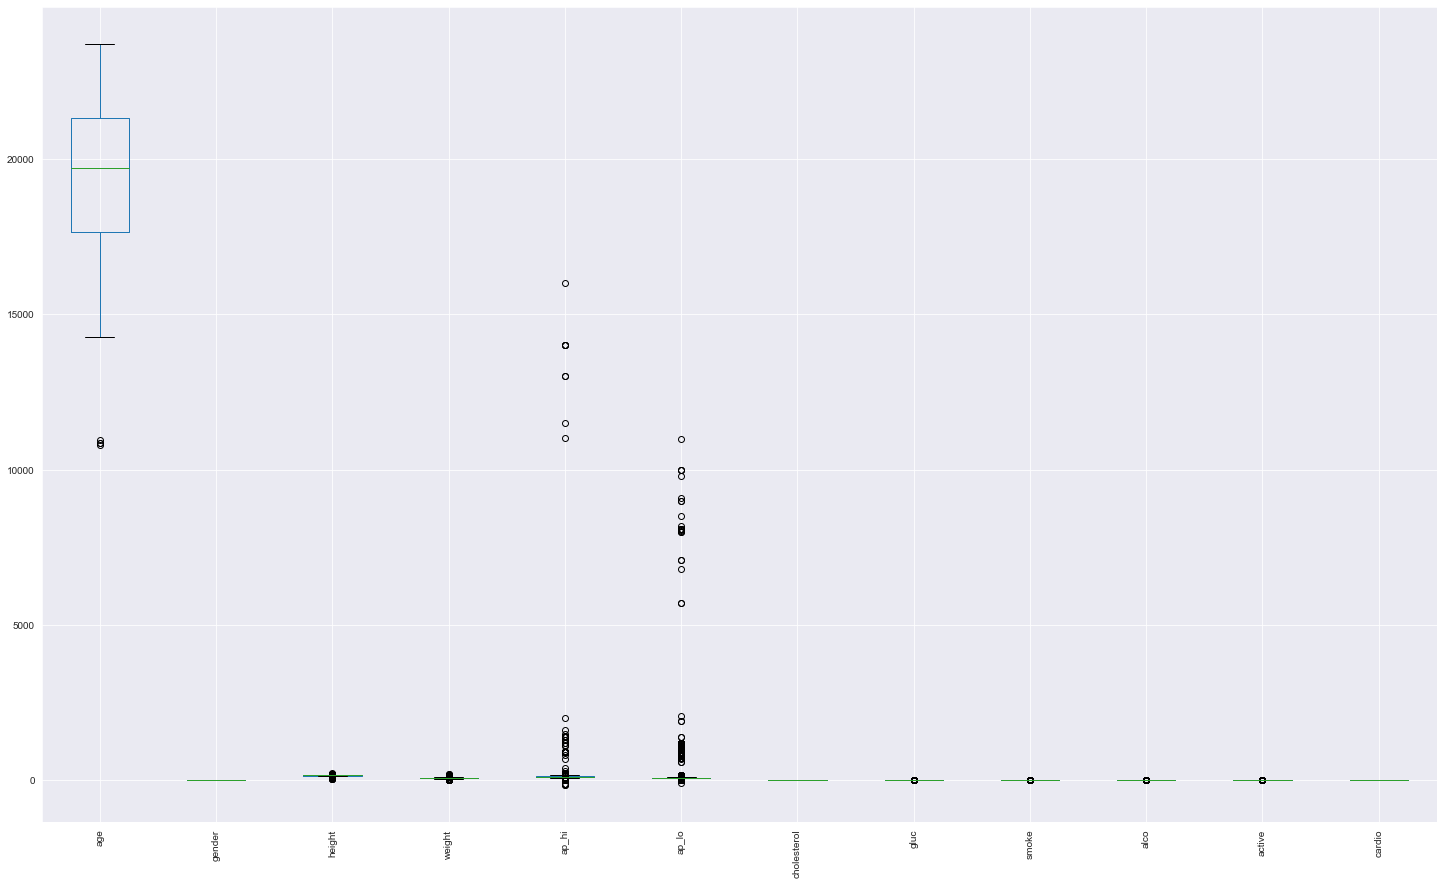

In [5]:
#ищу выбросы
data1=data.drop(['id'], axis = 1)
boxplot = data1.boxplot(figsize=(25,15), rot=90)

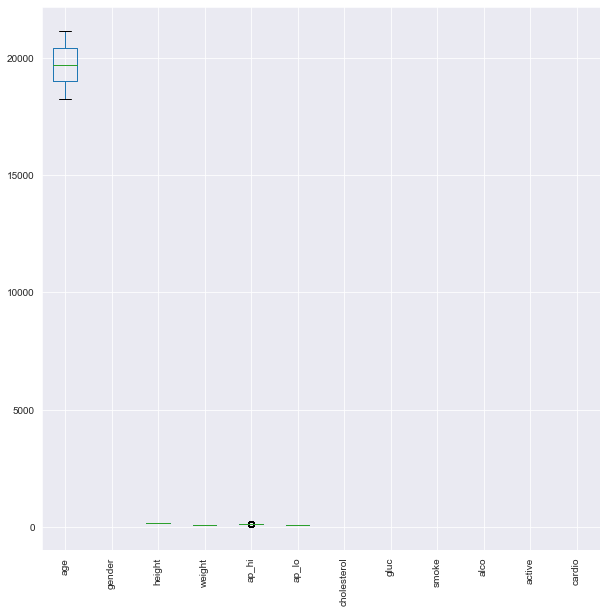

In [200]:
low = .3
high = .7
quant_d = data1.quantile([low, high])
filt_ = data1.apply(lambda x: x[(x>quant_d.loc[low,x.name]) & 
                                    (x < quant_d.loc[high,x.name])], axis=0)
boxplot = filt_.boxplot(figsize=(10,10), rot=90)

In [6]:
#ищу и удаляю выбросы
data[data['ap_hi']>10000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1
25519,36414,21361,1,169,71.0,14020,80,3,3,0,0,1,1
40852,58374,17438,1,169,70.0,16020,80,1,1,0,0,0,1
46912,66998,16910,2,180,78.0,14020,90,1,1,0,0,1,1
47253,67502,19731,1,160,65.0,14020,90,1,1,0,0,1,0
51438,73356,18784,2,168,65.0,11020,80,1,1,0,0,1,1
55459,79116,18307,1,152,76.0,13010,80,2,2,0,0,1,1
55847,79679,23182,1,161,105.0,13010,80,1,1,0,0,0,0


In [11]:
data.drop(data[data.ap_hi>200].index, inplace = True)

In [8]:
data.drop(data[data.ap_hi<20].index, inplace = True)

In [9]:
data.drop(data[data.ap_lo<30].index, inplace = True)
data.drop(data[data.ap_lo>200].index, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68785 entries, 0 to 69999
Data columns (total 13 columns):
id             68785 non-null int64
age            68785 non-null int64
gender         68785 non-null int64
height         68785 non-null int64
weight         68785 non-null float64
ap_hi          68785 non-null int64
ap_lo          68785 non-null int64
cholesterol    68785 non-null int64
gluc           68785 non-null int64
smoke          68785 non-null int64
alco           68785 non-null int64
active         68785 non-null int64
cardio         68785 non-null int64
dtypes: float64(1), int64(12)
memory usage: 7.3 MB


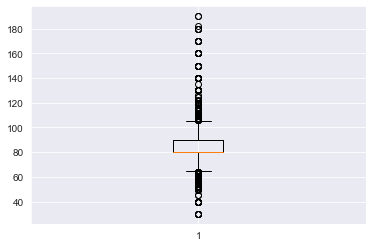

In [13]:
from pylab import *
r = boxplot(data['ap_lo'], showfliers=True) 

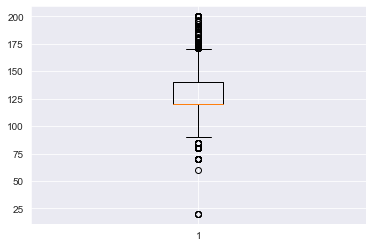

In [14]:
#проверяю после удаления
from pylab import *
r = boxplot(data['ap_hi'], showfliers=True) 

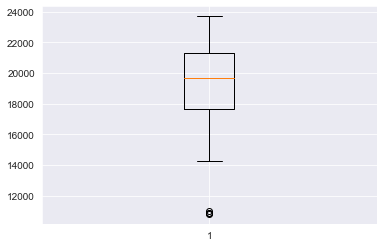

In [65]:
r = boxplot(data['age'], showfliers=True) 

In [19]:
#удаляю выброс в age
data.drop(data[data.age<14000].index, inplace = True)

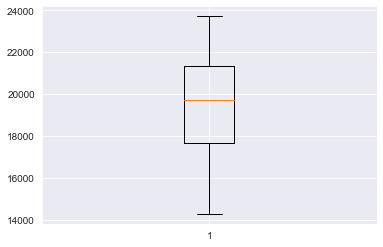

In [21]:
r1 = boxplot(data['age'], showfliers=True)

In [23]:
data2=data.drop(['id'], axis=1)
data3=data2.drop(['age'], axis=1)

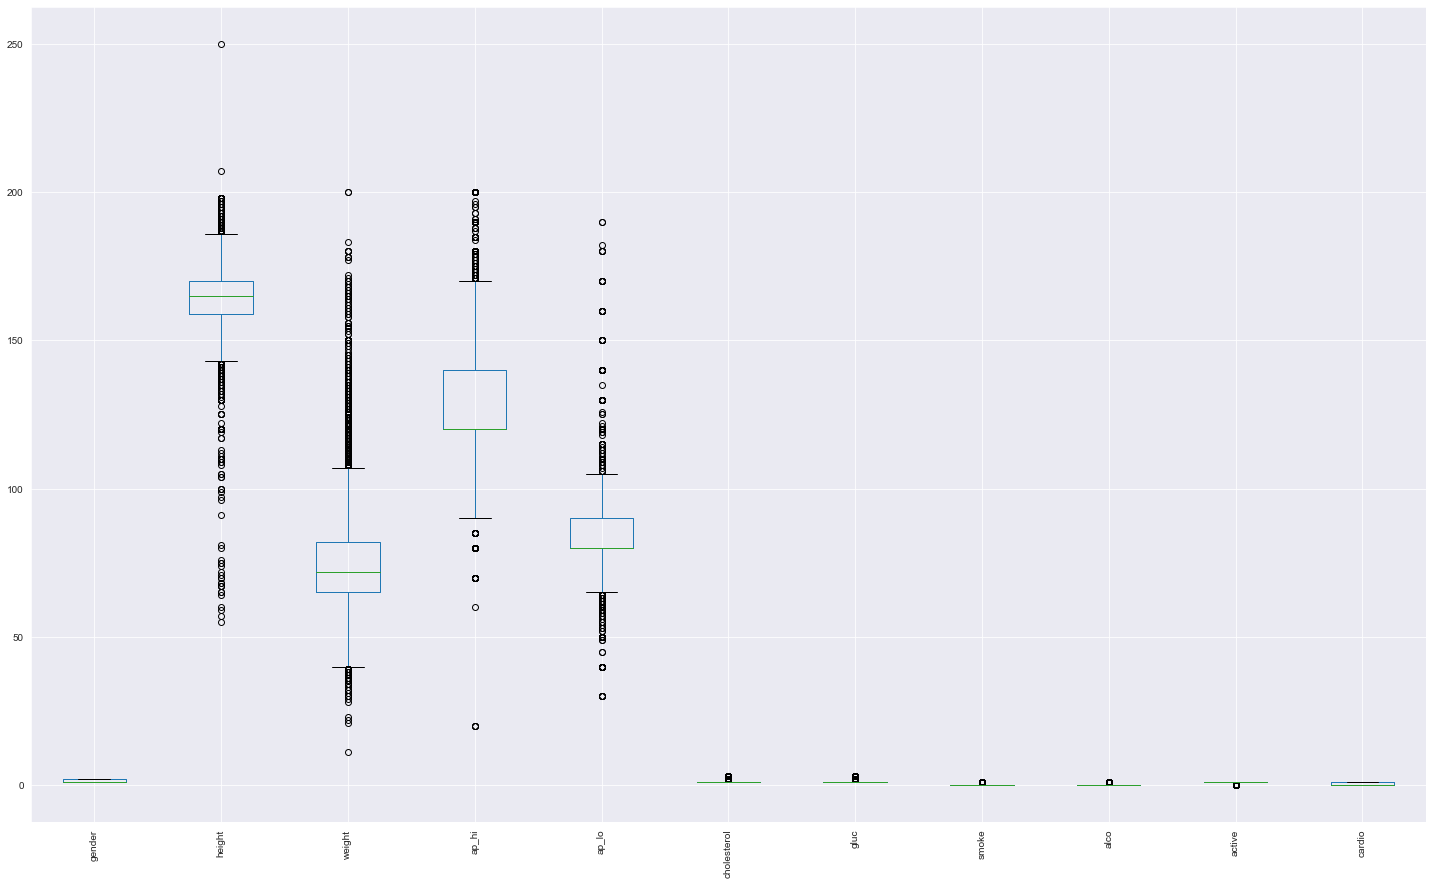

In [24]:
boxplot = data3.boxplot(figsize=(25,15), rot=90)

#Думаю, допустимо оставить выбросы в этих пределах

In [26]:
#сохраняю заголовки data перед нормализацией
headers = list(data.columns.values)

In [27]:
#нормализую данные
x, y = data.drop(['id', 'cardio'], axis=1), data.cardio

In [28]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(x)
data_norm = pd.DataFrame(np_scaled)
data_norm.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.436321,1.0,0.579487,0.269841,0.500000,0.3125,0.0,0.0,0.0,0.0,1.0
1,0.630748,0.0,0.517949,0.391534,0.666667,0.3750,1.0,0.0,0.0,0.0,1.0
2,0.485484,0.0,0.564103,0.280423,0.611111,0.2500,1.0,0.0,0.0,0.0,0.0
3,0.354736,1.0,0.584615,0.375661,0.722222,0.4375,0.0,0.0,0.0,0.0,1.0
4,0.338949,0.0,0.517949,0.238095,0.444444,0.1875,0.0,0.0,0.0,0.0,0.0


In [29]:
data_norm.columns = headers[1:12]
data_norm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.436321,1.0,0.579487,0.269841,0.500000,0.3125,0.0,0.0,0.0,0.0,1.0
1,0.630748,0.0,0.517949,0.391534,0.666667,0.3750,1.0,0.0,0.0,0.0,1.0
2,0.485484,0.0,0.564103,0.280423,0.611111,0.2500,1.0,0.0,0.0,0.0,0.0
3,0.354736,1.0,0.584615,0.375661,0.722222,0.4375,0.0,0.0,0.0,0.0,1.0
4,0.338949,0.0,0.517949,0.238095,0.444444,0.1875,0.0,0.0,0.0,0.0,0.0


In [30]:
#разделяю данные на тестовые и тренировочные
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_norm,y, test_size = 0.2, random_state = 42)

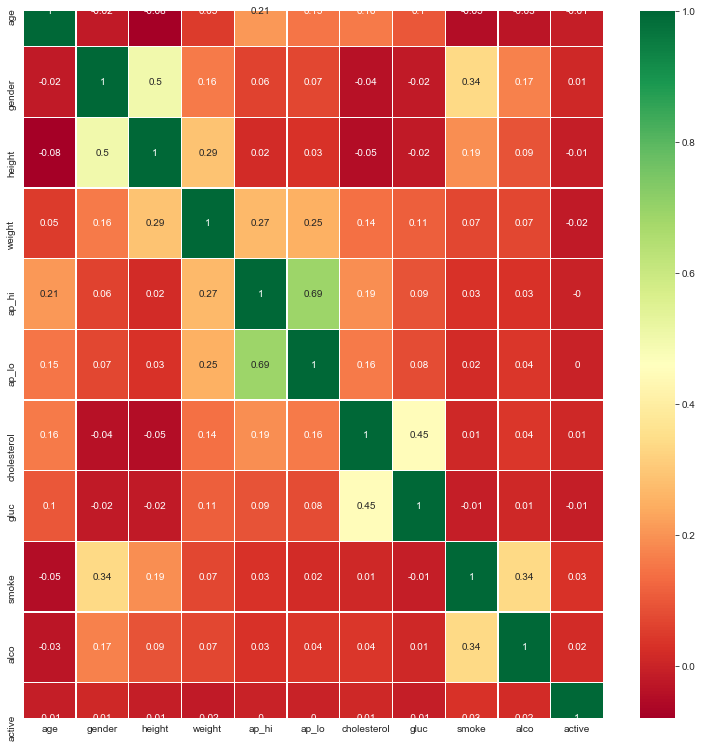

In [31]:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(data_norm.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

#сильно корреклирующих между собой элементов нет

In [32]:
#Лес решений
from sklearn.ensemble import RandomForestClassifier

# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


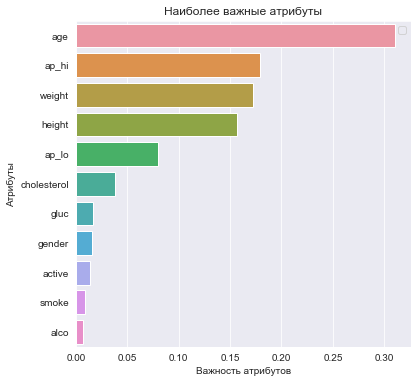

In [33]:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [ ]:
Выдвину гипотезу, что возраст влияет на возникновение болезни

In [34]:
from sklearn.metrics import classification_report

In [35]:
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      7001
           1       0.71      0.69      0.70      6745

    accuracy                           0.71     13746
   macro avg       0.71      0.71      0.71     13746
weighted avg       0.71      0.71      0.71     13746



0.7100247344682089

#Модель деревьев показывает, что точность гипотезы о вероятности возникновения болезни в зависимости от возраста, составляет 71%. Recall 73%. Проверю точность гипотезы путем постороения других моделей. 

In [48]:
from scipy.stats import spearmanr

In [51]:
#нужно ли??????
stat, p = spearmanr(data['age'], data['cardio']==1)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.234, p=0.000


In [36]:
import researchpy as rp

In [37]:
descriptives, results = rp.ttest(data.cardio, data.age)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cardio,68729.0,0.494726,0.499976,0.001907,0.490988,0.498464
1,age,68729.0,19464.450654,2467.600168,9.412495,19446.002177,19482.899131
2,combined,137458.0,9732.472690,9887.193100,26.667850,9680.204204,9784.741176


In [38]:
results

,Independent t-test,results
0,Difference (cardio - age) =,-19463.9559
1,Degrees of freedom =,137456.0000
2,t =,-2067.8847
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-11.1550
7,Hedge's g =,-11.1550
8,Glass's delta =,-38929.7947
9,r =,0.9843


In [ ]:
Difference > 0 p value = 1.0000 , переменные статистически значимы, следовательно, 
можем принять гипотезу, что возраст влияет на наличие болезни

In [39]:
#проверяю по T-критерию Стьюдента, pvalue=0.0 меньше 5%, соответственно выборки статистически значимы
healthy = data[data['cardio']==0]['age']

ill = data[data['cardio']==1]['age']

print(stats.ttest_ind(healthy, ill))

Ttest_indResult(statistic=-64.63594859307264, pvalue=0.0)


In [41]:
#визуально проверю распределение в выборках больных /здоровых людей
healthy_people = data[data['cardio']==0]['age']
ill_people = data[data['cardio']==1]['age']

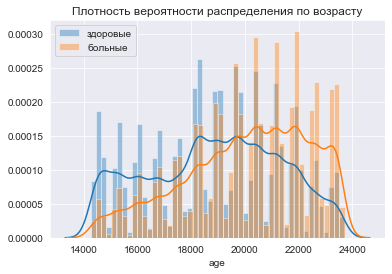

In [42]:
sns.distplot(healthy_people, 50)
sns.distplot(ill_people, 50)
plt.title('Плотность вероятности распределения по возрасту')
plt.legend(['здоровые', 'больные'])
plt.show()

Text(0.5, 0, 'Возраст')

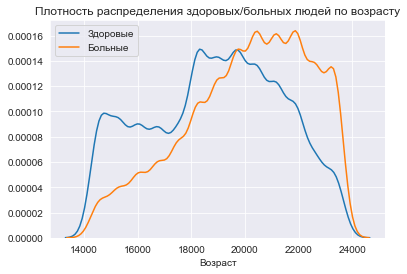

In [43]:
fig, ax = plt.subplots()
sns.kdeplot(data[data['cardio']==0]['age'])
sns.kdeplot(data[data['cardio']==1]['age'])
ax.set_title("Плотность распределения здоровых/больных людей по возрасту")
plt.legend(['Здоровые', 'Больные'])
plt.xlabel('Возраст')

In [ ]:
#Оба распределения стремятся к нормальному

In [44]:
#проверяю на сбалансированность
print('Количество здоровых людей: ', data[data['cardio']==0].shape)
print('Количество больных людей: ', data[data['cardio']==1].shape)

Количество здоровых людей:  (34727, 13)
Количество больных людей:  (34002, 13)


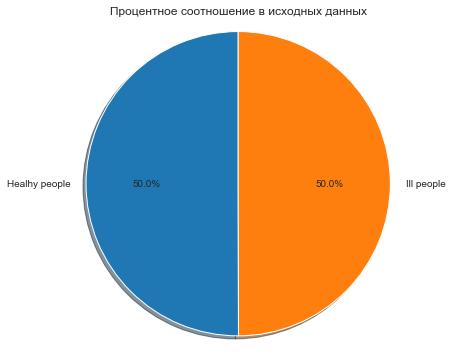

In [45]:
labels = 'Healhy people', 'Ill people'
sizes = [35021, 34979]
explode = (0, 0)  
fig1, ax1 = plt.subplots(figsize=(6,6))
plt.title('Процентное соотношение в исходных данных')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Точность модели: {}".format(nb.score(x_test,y_test)))

Точность модели: 0.7082787720064019


In [48]:
print(classification_report(y_test, nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      7001
           1       0.75      0.60      0.67      6745

    accuracy                           0.71     13746
   macro avg       0.72      0.71      0.70     13746
weighted avg       0.72      0.71      0.70     13746



In [ ]:
#Recall меньше, чем Random Forest

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      7001
           1       0.74      0.67      0.70      6745

    accuracy                           0.72     13746
   macro avg       0.72      0.72      0.72     13746
weighted avg       0.72      0.72      0.72     13746



In [ ]:
В итоге, гипотезу принимаю